In [ ]:
#What should I charge?

In [10]:
import requests
import pandas as pd
import sqlite3 as lite
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
from sklearn.cross_validation import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('dog-vacay.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,city,fee,names,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
0,"Phoenix, Arizona",35,Big Backyard in Central Phoenix,5,8,1,26,2,1,0,1,0,0,0,0,0,0
1,"Phoenix, Arizona",35,SUZY Q to the Rescue,5,16,2,30,3,1,0,0,1,0,0,0,0,1
2,"Phoenix, Arizona",35,24/7 Dog boarding,0,0,1,0,4,1,0,1,1,1,0,0,0,0
3,"Phoenix, Arizona",38,Messy4dogs@gmail.com,5,2,3,3,4,1,0,1,1,1,0,0,0,0
4,"Phoenix, Arizona",25,Pet Paradise,5,1,1,5,4,1,0,0,1,1,1,0,0,0


In [5]:
#Start by looking at the average
df.describe()

,fee,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
count,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.00000,4662.000000
mean,38.678464,3.416345,4.817889,1.582154,9.806521,3.162377,0.947662,0.349206,0.637066,0.431145,0.403904,0.154011,0.028529,0.01094,0.199914
std,11.184772,2.308807,9.537766,0.767003,19.448652,1.062929,0.222732,0.476770,0.480898,0.495289,0.490731,0.360998,0.166495,0.10403,0.399979
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,38.000000,5.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,45.000000,5.000000,5.000000,2.000000,10.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,95.000000,5.000000,98.000000,3.000000,370.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


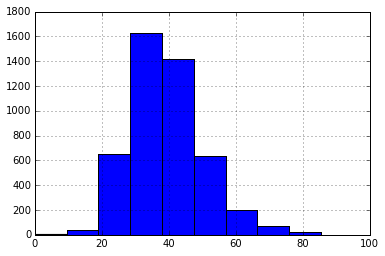

In [6]:
#Histogram of fees
p = df['fee'].hist()
plt.show()

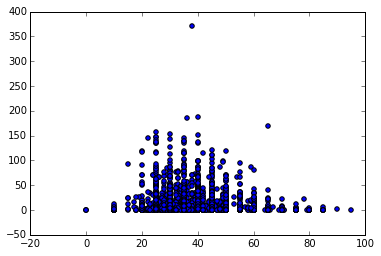

In [13]:
#Create a scatter plot matrix
plt.scatter(df['fee'], df['review'])
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

In [13]:
#Extract columns
fee = df['fee']
repeat = df['repeat']
ratings = df['ratings']
response_time = df['response_time']
review = df['review']

In [14]:
#Reshape the series data type
#The dependent variable
y = np.matrix(ratings).transpose()
#The independent variable
x1 = np.matrix(response_time).transpose()
x2 = np.matrix(fee).transpose()

In [15]:
#put the two columns together to create an input matrix (with one column for each independent variable)
x = np.column_stack([x1, x2])

In [16]:
#create linear model
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     48.67
Date:                Wed, 23 Dec 2015   Prob (F-statistic):           1.20e-21
Time:                        15:03:49   Log-Likelihood:                -10467.
No. Observations:                4662   AIC:                         2.094e+04
Df Residuals:                    4659   BIC:                         2.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.0493      0.138     29.366      0.000         3.779     4.320
x1             0.2236      0.044      5.123      0.000         0.138     0.309
x2            -0.0255      0.003     -8.522      0.000        -0.031    -0.020
==============================================================================
Omnibus:                    11477.871   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.938
Skew:                          -0.782   Prob(JB):                    1.46e-173
Kurtosis:                       1.716   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
#df.groupby('city').mean()

In [3]:
#df.groupby('city').std()

In [4]:
#df.groupby('city').count()

In [47]:
#Logistic regression
df['fee35'] = df['fee'].map(lambda x: 1 if x >= 35 else 0)

In [48]:
#df.drop(['booked'], axis=1, inplace=True)

In [49]:
intercept = [1] * len(df)
df['intercept'] = intercept

In [50]:
ind_vars = ['intercept','review', 'repeat']

In [51]:
#df.head()

In [52]:
logit = sm.Logit(df['fee35'], df[ind_vars])

In [53]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.634137
         Iterations 4


In [54]:
coeff = result.params
print coeff

intercept    0.764227
review       0.004238
repeat      -0.023190
dtype: float64


In [55]:
def logistic_function(review, repeat):
    # p(x) = 1/(1 + e^(intercept + 0.087423(FicoScore) − 0.000174(LoanAmount))
    prob = 1/(1 + math.exp(coeff[0] + coeff[1]*review +coeff[2]*repeat))
    if prob > 0.7:
        p = 1
    else:
        p = 0
    return prob, p

In [58]:
logistic_function(10, 10)

(0.3601514564111888, 0)

In [26]:
dfTrain, dfTest = train_test_split(df, test_size=0.2, random_state=0)

In [33]:
dfTrain = pd.DataFrame(dfTrain, columns=df.columns)
dfTest = pd.DataFrame(dfTest, columns=df.columns)

In [34]:
cols = ['review', 'repeat']

In [35]:
model = KNeighborsClassifier(n_neighbors=3)

In [36]:
model.fit(dfTrain[cols], dfTrain['fee35'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [37]:
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(dfTrain[cols], dfTrain['fee35'])    # make predictions
    expected = dfTest['fee35']
    predicted = model.predict(dfTest[cols])
    # misclassification rate
    error_rate = (predicted != expected).mean()
    print('%d:, %.2f' % (k, error_rate))

1:, 0.46
2:, 0.49
3:, 0.45
4:, 0.45
5:, 0.46
6:, 0.51
7:, 0.51
8:, 0.51
9:, 0.48
10:, 0.49
11:, 0.48
12:, 0.47
13:, 0.47
14:, 0.48
15:, 0.46
16:, 0.46
17:, 0.47
18:, 0.47
19:, 0.48


In [41]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(dfTrain[cols], dfTrain['fee35'])
predicted = model.predict([40,1])
print predicted

[0]
